# TF Transform


In [1]:
import tensorflow as tf
tf.config.experimental.set_memory_growth(tf.config.experimental.list_physical_devices('GPU')[0], True)

import numpy as np
import sklearn

import matplotlib as mpl
import matplotlib.pyplot as plt

import os

In [2]:
try:
    import tensorflow_transform as tft

    def preprocess(inputs):  # inputs is a batch of input features
        median_age = inputs["housing_median_age"]
        ocean_proximity = inputs["ocean_proximity"]
        standardized_age = tft.scale_to_z_score(median_age - tft.mean(median_age))
        ocean_proximity_id = tft.compute_and_apply_vocabulary(ocean_proximity)
        return {
            "standardized_median_age": standardized_age,
            "ocean_proximity_id": ocean_proximity_id
        }
except ImportError:
    print("TF Transform is not installed. Try running: pip3 install -U tensorflow-transform")

# TensorFlow Datasets

In [3]:
import tensorflow_datasets as tfds

datasets = tfds.load(name="mnist")
mnist_train, mnist_test = datasets["train"], datasets["test"]

In [4]:
print(tfds.list_builders())

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'arc', 'bair_robot_pushing_small', 'bccd', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'blimp', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19sum', 'crema_d', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'dementiabank', 'diabetic_retinopathy_detection', 'div2k', 'dmlab', 'downsampled_imagenet', 'dsprites', 'dtd', 'duke_ultrasound', 'e2e_cleaned', 'emnist', 

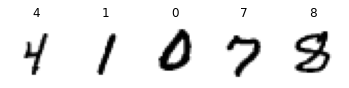

In [5]:
plt.figure(figsize=(6, 3))
mnist_train = mnist_train.repeat(5).batch(32).prefetch(1)
for item in mnist_train:
    images = item["image"]
    labels = item["label"]
    for index in range(5):
        plt.subplot(1, 5, index + 1)
        image = images[index, ..., 0]
        label = labels[index].numpy()
        plt.imshow(image, cmap="binary")
        plt.title(label)
        plt.axis("off")
    break # just showing part of the first batch

In [6]:
datasets = tfds.load(name="mnist")
mnist_train, mnist_test = datasets["train"], datasets["test"]
mnist_train = mnist_train.repeat(5).batch(32)
mnist_train = mnist_train.map(lambda items: (items["image"], items["label"]))
mnist_train = mnist_train.prefetch(1)

for images, labels in mnist_train.take(1):
    print(images.shape)
    print(labels.numpy())

(32, 28, 28, 1)
[4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]


In [7]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
datasets = tfds.load(name="mnist", batch_size=32, as_supervised=True)

In [10]:
mnist_train = datasets["train"]#.repeat()#.prefetch(1)

# TODO: Fix this

# tf.data.Dataset.from_generator(
#     mnist_train,
#     (tf.uint8, tf.int64)
# )

#
# mnist_train_categorical = tf.keras.utils.to_categorical(
#     y=[(image, label) for item in mnist_train],
#     num_classes=10
# )
#
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=[28, 28, 1]),
#     tf.keras.layers.Lambda(lambda images: tf.cast(images, tf.float32)),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

In [11]:
# tf.keras.losses.sparse_categorical_crossentropy,

#
# model.compile(
#     loss='sparse_categorical_crossentropy',
#     optimizer=tf.keras.optimizers.SGD(lr=1e-3),
#     metrics=[tf.keras.metrics.Accuracy()]
# )
#
# model.fit(
#     mnist_train,
#     steps_per_epoch=60000 // 32,
#     epochs=5
# )

# TensorFlow Hub

In [12]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
import tensorflow_hub as hub

hub_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1",
                           output_shape=[50], input_shape=[], dtype=tf.string)

model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 50)                48190600  
_________________________________________________________________
dense (Dense)                (None, 16)                816       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 48,191,433
Trainable params: 833
Non-trainable params: 48,190,600
_________________________________________________________________


In [14]:
sentences = tf.constant(["It was a great movie", "The actors were amazing"])

embeddings = hub_layer(sentences)

In [15]:
embeddings

<tf.Tensor: shape=(2, 50), dtype=float32, numpy=
array([[ 7.45939985e-02,  2.76720114e-02,  9.38646123e-02,
         1.25124469e-01,  5.40293928e-04, -1.09435350e-01,
         1.34755149e-01, -9.57818255e-02, -1.85177118e-01,
        -1.69703495e-02,  1.75612606e-02, -9.06603858e-02,
         1.12110220e-01,  1.04646273e-01,  3.87700424e-02,
        -7.71859884e-02, -3.12189370e-01,  6.99466765e-02,
        -4.88970093e-02, -2.99049795e-01,  1.31183028e-01,
        -2.12630898e-01,  6.96169436e-02,  1.63592950e-01,
         1.05169769e-02,  7.79720694e-02, -2.55230188e-01,
        -1.80790052e-01,  2.93739915e-01,  1.62875261e-02,
        -2.80566931e-01,  1.60284728e-01,  9.87277832e-03,
         8.44555616e-04,  8.39456245e-02,  3.24002892e-01,
         1.53253034e-01, -3.01048346e-02,  8.94618109e-02,
        -2.39153411e-02, -1.50188789e-01, -1.81733668e-02,
        -1.20483577e-01,  1.32937476e-01, -3.35325629e-01,
        -1.46504581e-01, -1.25251599e-02, -1.64428815e-01,
       

# Exercises

## 1. to 8.
See Appendix A

## 9.
### a.
_Exercise: Load the Fashion MNIST dataset (introduced in Chapter 10); split it into a training set,
a validation set, and a test set; shuffle the training set; and save each dataset to multiple TFRecord files.
Each record should be a serialized `Example` protobuf with two features: the serialized
image (use `tf.io.serialize_tensor()` to serialize each image), and the label. Note: for large images,
you could use `tf.io.encode_jpeg()` instead. This would save a lot of space, but it would lose a bit of image quality._

In [16]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [17]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
train_set = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train))
valid_set = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))
test_set = tf.data.Dataset.from_tensor_slices((X_test, y_test))


In [19]:
from tensorflow.train import Feature, Features, Example, BytesList, Int64List

In [20]:
def create_example(image, label):
    image_data = tf.io.serialize_tensor(image)
    #image_data = tf.io.encode_jpeg(image[..., np.newaxis])
    return Example(
        features=Features(
            feature={
                "image": Feature(bytes_list=BytesList(value=[image_data.numpy()])),
                "label": Feature(int64_list=Int64List(value=[label.numpy()]))
            }
        ))

In [21]:
for image, label in valid_set.take(1):
    print(create_example(image, label))

features {
  feature {
    key: "image"
    value {
      bytes_list {
        value: "\010\004\022\010\022\002\010\034\022\002\010\034\"\220\006\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\001\000\000\rI\000\000\001\004\000\000\000\000\001\001\000\000\000\000\000\000\000\000\000\000\000\000\000\003\000$\210\177>6\000\000\000\001\003\004\000\000\003\000\000\000\000\000\000\000\000\000\000\000\000\006\000f\314\260\206\220{\027\000\000\000\000\014\n\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\233\354\317\262k\234\241m@\027M\202H\017\000\000\000\000\000\000\000\000\000\000\000\001\000E\317\337\332\330\330\243\177yz\222\215X\254B\000\000\00

The following function saves a given dataset to a set of TFRecord files. The examples are written to the files
in a round-robin fashion. To do this, we enumerate all the examples using the `dataset.enumerate()` method,
and we compute `index % n_shards` to decide which file to write to. We use the standard `contextlib.ExitStack`
class to make sure that all writers are properly closed whether or not an I/O error occurs while writing.

In [22]:
from contextlib import ExitStack

def write_tfrecords(name, dataset, n_shards=10):
    paths = ["{}.tfrecord-{:05d}-of-{:05d}".format(name, index, n_shards)
             for index in range(n_shards)]

    with ExitStack() as stack:
        writers = [stack.enter_context(tf.io.TFRecordWriter(path))
                   for path in paths]
        for index, (image, label) in dataset.enumerate():
            shard = index % n_shards
            example = create_example(image, label)
            writers[shard].write(example.SerializeToString())
    return paths

In [27]:
train_filepaths = write_tfrecords("my_fashion_mnist.train", train_set)
valid_filepaths = write_tfrecords("my_fashion_mnist.valid", valid_set)
test_filepaths = write_tfrecords("my_fashion_mnist.test", test_set)

### b.
_Exercise: Then use tf.data to create an efficient dataset for each set. Finally, use a Keras model to train
these datasets, including a preprocessing layer to standardize each input feature. Try to make the input
pipeline as efficient as possible, using TensorBoard to visualize profiling data._

In [28]:
def preprocess(tfrecord):
    feature_descriptions = {
        "image": tf.io.FixedLenFeature([], tf.string, default_value=""),
        "label": tf.io.FixedLenFeature([], tf.int64, default_value=-1)
    }
    example = tf.io.parse_single_example(tfrecord, feature_descriptions)
    image = tf.io.parse_tensor(example["image"], out_type=tf.uint8)
    #image = tf.io.decode_jpeg(example["image"])
    image = tf.reshape(image, shape=[28, 28])
    return image, example["label"]

def mnist_dataset(filepaths, n_read_threads=5, shuffle_buffer_size=None,
                  n_parse_threads=5, batch_size=32, cache=True):

    dataset = tf.data.TFRecordDataset(filepaths,
                                      num_parallel_reads = n_read_threads)
    if cache:
        dataset = dataset.cache()
    if shuffle_buffer_size:
        dataset = dataset.shuffle(shuffle_buffer_size)

    dataset = dataset.map(preprocess,
                          num_parallel_calls = n_parse_threads)
    dataset = dataset.batch(batch_size)
    return dataset.prefetch(1)

In [29]:
train_set = mnist_dataset(train_filepaths, shuffle_buffer_size=60000)
valid_set = mnist_dataset(train_filepaths)
test_set = mnist_dataset(train_filepaths)

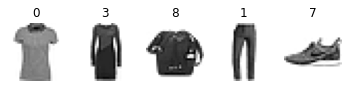

In [30]:
for X, y in train_set.take(1):
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(X[i].numpy(), cmap="binary")
        plt.axis("off")
        plt.title(str(y[i].numpy()))

In [31]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

class Standardization(tf.keras.layers.Layer):
    def adapt(self, data_sample):
        self.means_ = np.mean(data_sample, axis=0, keepdims=True)
        self.stds_ = np.std(data_sample, axis=0, keepdims=True)
    def call(self, inputs):
        return (inputs - self.means_) / (self.stds_ + tf.keras.backend.epsilon())

standardization = Standardization(input_shape=[28, 28])
# or perhaps soon:
# standardization = tf.keras.layers.Normalization()

sample_image_batches = train_set.take(100).map(lambda image, label: image)

sample_images = np.concatenate(
    list(sample_image_batches.as_numpy_iterator()),
    axis=0
).astype(np.float32)

standardization.adapt(sample_images)

model = tf.keras.models.Sequential([
    standardization,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="nadam",
    metrics=["accuracy"]
)

In [32]:
from datetime import datetime

logs = os.path.join(
    os.curdir, "my_logs",
    "run_" + datetime.now().strftime("%Y%m%d_%H%M%S")
)

tensorboard_cb = tf.keras.callbacks.TensorBoard(
    log_dir=logs,
    histogram_freq=1,
    profile_batch=10
)

model.fit(
    train_set,
    epochs=5,
    validation_data=valid_set,
    callbacks=[tensorboard_cb]
)

Epoch 1/5


InternalError:  Blas GEMM launch failed : a.shape=(32, 784), b.shape=(784, 100), m=32, n=100, k=784
	 [[node sequential/dense/MatMul (defined at <ipython-input-32-728c76230b32>:14) ]] [Op:__inference_train_function_426304]

Function call stack:
train_function


**Warning:** The profiling tab in TensorBoard works if you use TensorFlow 2.2+. You also need to make
sure `tensorboard_plugin_profile` is installed (and restart Jupyter if necessary).

In [ ]:
# Launch tensorboard from terminal

# %load_ext tensorboard
# %tensorboard --logdir=./my_logs --port=6006

## 10.
_Exercise: In this exercise you will download a dataset, split it, create a `tf.data.Dataset` to load it
and preprocess it efficiently, then build and train a binary classification model containing an `Embedding` layer._

### a.
_Exercise: Download the [Large Movie Review Dataset](https://homl.info/imdb), which contains 50,000 movies reviews
from the [Internet Movie Database](https://imdb.com/). The data is organized in two directories,
`train` and `test`, each containing a `pos` subdirectory with 12,500 positive reviews and a `neg` subdirectory
with 12,500 negative reviews. Each review is stored in a separate text file. There are other files and
folders (including preprocessed bag-of-words), but we will ignore them in this exercise._

In [ ]:
from pathlib import Path

DOWNLOAD_ROOT = "http://ai.stanford.edu/~amaas/data/sentiment/"
FILENAME = "aclImdb_v1.tar.gz"
filepath = tf.keras.utils.get_file(FILENAME, DOWNLOAD_ROOT + FILENAME, extract=True)
path = Path(filepath).parent / "aclImdb"
path

In [ ]:
for name, subdirs, files in os.walk(path):
    indent = len(Path(name).parts) - len(path.parts)
    print("    " * indent + Path(name).parts[-1] + os.sep)
    for index, filename in enumerate(sorted(files)):
        if index == 3:
            print("    " * (indent + 1) + "...")
            break
        print("    " * (indent + 1) + filename)

In [ ]:
def review_paths(dirpath):
    return [str(path) for path in dirpath.glob("*.txt")]

train_pos = review_paths(path / "train" / "pos")
train_neg = review_paths(path / "train" / "neg")
test_valid_pos = review_paths(path / "test" / "pos")
test_valid_neg = review_paths(path / "test" / "neg")

len(train_pos), len(train_neg), len(test_valid_pos), len(test_valid_neg)

### b.
_Exercise: Split the test set into a validation set (15,000) and a test set (10,000)._

In [ ]:
np.random.shuffle(test_valid_pos)

test_pos = test_valid_pos[:5000]
test_neg = test_valid_neg[:5000]

valid_pos = test_valid_pos[5000:]
valid_neg = test_valid_neg[5000:]

### c.
_Exercise: Use tf.data to create an efficient dataset for each set._

Since the dataset fits in memory, we can just load all the data using pure Python code and use
`tf.data.Dataset.from_tensor_slices()`:

In [ ]:
def imdb_dataset(filepaths_positive, filepaths_negative):
    reviews = []
    labels = []
    for filepaths, label in ((filepaths_negative, 0), (filepaths_positive, 1)):
        for filepath in filepaths:
            with open(filepath, encoding='utf8') as review_file:
                reviews.append(review_file.read())
            labels.append(label)
    return tf.data.Dataset.from_tensor_slices((tf.constant(reviews), tf.constant(labels)))

In [ ]:
for X, y in imdb_dataset(train_pos, train_neg).take(3):
    print(X)
    print(y)
    print()

In [ ]:
%timeit -r1 for X, y in imdb_dataset(train_pos, train_neg).repeat(10): pass

It takes about 20 seconds to load the dataset and go through it 10 times.

But let's pretend the dataset does not fit in memory, just to make things more interesting. Luckily, each
review fits on just one line (they use `<br />` to indicate line breaks), so we can read the reviews
using a `TextLineDataset`. If they didn't we would have to preprocess the input files (e.g., converting
them to TFRecords). For very large datasets, it would make sense a tool like Apache Beam for that.

In [ ]:
def imdb_dataset(filepaths_positive, filepaths_negative, n_read_threads=5):

    dataset_neg = tf.data.TextLineDataset(
        filepaths_negative,
        num_parallel_reads=n_read_threads
    )

    dataset_neg = dataset_neg.map(lambda review: (review, 0))

    dataset_pos = tf.data.TextLineDataset(
        filepaths_positive,
        num_parallel_reads=n_read_threads
    )

    dataset_pos = dataset_pos.map(lambda review: (review, 1))
    return tf.data.Dataset.concatenate(dataset_pos, dataset_neg)

In [ ]:
%timeit -r1 for X, y in imdb_dataset(train_pos, train_neg).repeat(10): pass

Now it takes about 34 seconds to go through the dataset 10 times. That's much slower, essentially because the
dataset is not cached in RAM, so it must be reloaded at each epoch. If you add `.cache()` just before
`.repeat(10)`, you will see that this implementation will be about as fast as the previous one.

In [ ]:
%timeit -r1 for X, y in imdb_dataset(train_pos, train_neg).cache().repeat(10): pass

In [ ]:
batch_size = 32

train_set = imdb_dataset(train_pos, train_neg).shuffle(25000).batch(batch_size).prefetch(1)
valid_set = imdb_dataset(valid_pos, valid_neg).batch(batch_size).prefetch(1)
test_set = imdb_dataset(test_pos, test_neg).batch(batch_size).prefetch(1)

### d.
_Exercise: Create a binary classification model, using a `TextVectorization` layer to preprocess each review.
If the `TextVectorization` layer is not yet available (or if you like a challenge), try to create your own
custom preprocessing layer: you can use the functions in the `tf.strings` package, for example `lower()` to
make everything lowercase, `regex_replace()` to replace punctuation with spaces, and `split()` to split words
on spaces. You should use a lookup table to output word indices, which must be prepared in the `adapt()` method._

Let's first write a function to preprocess the reviews, cropping them to 300 characters, converting them to
lower case, then replacing `<br />` and all non-letter characters to spaces, splitting the reviews into words,
and finally padding or cropping each review so it ends up with exactly `n_words` tokens:

In [ ]:
def preprocess(X_batch, n_words=50):
    shape = tf.shape(X_batch) * tf.constant([1, 0]) + tf.constant([0, n_words])
    Z = tf.strings.substr(X_batch, 0, 300)
    Z = tf.strings.lower(Z)
    Z = tf.strings.regex_replace(Z, b"<br\\s*/?>", b" ")
    Z = tf.strings.regex_replace(Z, b"[^a-z]", b" ")
    Z = tf.strings.split(Z)
    return Z.to_tensor(shape=shape, default_value=b"<pad>")

X_example = tf.constant(["It's a great, great movie! I loved it.", "It was terrible, run away!!!"])
preprocess(X_example)

Now let's write a second utility function that will take a data sample with the same format as the
output of the `preprocess()` function, and will output the list of the top `max_size` most frequent words,
ensuring that the padding token is first:

In [ ]:
from collections import Counter

def get_vocabulary(data_sample, max_size=1000):
    preprocessed_reviews = preprocess(data_sample).numpy()
    counter = Counter()
    for words in preprocessed_reviews:
        for word in words:
            if word != b"<pad>":
                counter[word] += 1
    return [b"<pad>"] + [word for word, count in counter.most_common(max_size)]

get_vocabulary(X_example)

Now we are ready to create the `TextVectorization` layer. Its constructor just saves the
hyperparameters (`max_vocabulary_size` and `n_oov_buckets`). The `adapt()` method computes the vocabulary using
the `get_vocabulary()` function, then it builds a `StaticVocabularyTable` (see Chapter 16 for more details).
The `call()` method preprocesses the reviews to get a padded list of words for each review, then it
uses the `StaticVocabularyTable` to lookup the index of each word in the vocabulary:

In [ ]:
class TextVectorization(tf.keras.layers.Layer):
    def __init__(self, max_vocabulary_size=1000, n_oov_buckets=100, dtype=tf.string, **kwargs):
        super().__init__(dtype=dtype, **kwargs)
        self.max_vocabulary_size = max_vocabulary_size
        self.n_oov_buckets = n_oov_buckets

    def adapt(self, data_sample):
        self.vocab = get_vocabulary(data_sample, self.max_vocabulary_size)
        words = tf.constant(self.vocab)
        word_ids = tf.range(len(self.vocab), dtype=tf.int64)
        vocab_init = tf.lookup.KeyValueTensorInitializer(words, word_ids)
        self.table = tf.lookup.StaticVocabularyTable(vocab_init, self.n_oov_buckets)

    def call(self, inputs):
        preprocessed_inputs = preprocess(inputs)
        return self.table.lookup(preprocessed_inputs)

Let's try it on our small `X_example` we defined earlier:

In [ ]:
text_vectorization = TextVectorization()

text_vectorization.adapt(X_example)
text_vectorization(X_example)

Looks good! As you can see, each review was cleaned up and tokenized, then each word was encoded as its index
in the vocabulary (all the 0s correspond to the `<pad>` tokens).

Now let's create another `TextVectorization` layer and let's adapt it to the full IMDB training set (if the
training set did not fit in RAM, we could just use a smaller sample of the training set by
calling `train_set.take(500)`):

In [ ]:
max_vocabulary_size = 1000
n_oov_buckets = 100

sample_review_batches = train_set.map(lambda review, label: review)

sample_reviews = np.concatenate(
    list(sample_review_batches.as_numpy_iterator()),
    axis=0
)

text_vectorization = TextVectorization(
    max_vocabulary_size,
    n_oov_buckets,
    input_shape=[]
)

text_vectorization.adapt(sample_reviews)

Let's run it on the same `X_example`, just to make sure the word IDs are larger now, since the vocabulary bigger:

In [ ]:
text_vectorization(X_example)

Good! Now let's take a look at the first 10 words in the vocabulary:

In [ ]:
text_vectorization.vocab[:10]

These are the most common words in the reviews.

Now to build our model we will need to encode all these word IDs somehow. One approach is to create bags of
words: for each review, and for each word in the vocabulary, we count the number of occurences of that
word in the review. For example:

In [ ]:
simple_example = tf.constant([[1, 3, 1, 0, 0], [2, 2, 0, 0, 0]])
tf.reduce_sum(tf.one_hot(simple_example, 4), axis=1)

The first review has 2 times the word 0, 2 times the word 1, 0 times the word 2, and 1 time the word 3, so
its bag-of-words representation is `[2, 2, 0, 1]`. Similarly, the second review has 3 times the word 0, 0 times
the word 1, and so on. Let's wrap this logic in a small custom layer, and let's test it. We'll drop the counts
for the word 0, since this corresponds to the `<pad>` token, which we don't care about.

In [ ]:
class BagOfWords(tf.keras.layers.Layer):
    def __init__(self, n_tokens, dtype=tf.int32, **kwargs):
        super().__init__(dtype=tf.int32, **kwargs)
        self.n_tokens = n_tokens

    def call(self, inputs):
        one_hot = tf.one_hot(inputs, self.n_tokens)
        return tf.reduce_sum(one_hot, axis=1)[:, 1:]

Let's test it:

In [ ]:
bag_of_words = BagOfWords(n_tokens=4)
bag_of_words(simple_example)

It works fine! Now let's create another `BagOfWord` with the right vocabulary size for our training set:

In [ ]:
n_tokens = max_vocabulary_size + n_oov_buckets + 1 # add 1 for <pad>
bag_of_words = BagOfWords(n_tokens)

We're ready to train the model!

In [ ]:
model = tf.keras.models.Sequential([
    text_vectorization,
    bag_of_words,
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model.compile(
    loss="binary_crossentropy",
    optimizer="nadam",
    metrics=["accuracy"]
)

model.fit(
    train_set,
    epochs=5,
    validation_data=valid_set
)

We get about 75% accuracy on the validation set after just the first epoch, but after that the model makes no
progress. We will do better in Chapter 16. For now the point is just to perform efficient preprocessing
using `tf.data` and Keras preprocessing layers.

### e.
_Exercise: Add an `Embedding` layer and compute the mean embedding for each review, multiplied by the square
root of the number of words (see Chapter 16). This rescaled mean embedding can then be passed to the
rest of your model._

To compute the mean embedding for each review, and multiply it by the square root of the number of words in
that review, we will need a little function:

In [ ]:
def compute_mean_embedding(inputs):
    not_pad = tf.math.count_nonzero(inputs, axis=-1)
    n_words = tf.math.count_nonzero(not_pad, axis=-1, keepdims=True)
    sqrt_n_words = tf.math.sqrt(tf.cast(n_words, tf.float32))
    return tf.reduce_mean(inputs, axis=1) * sqrt_n_words

another_example = tf.constant([
    [[1., 2., 3.], [4., 5., 0.], [0., 0., 0.]],
    [[6., 0., 0.], [0., 0., 0.], [0., 0., 0.]]
])

compute_mean_embedding(another_example)

Let's check that this is correct. The first review contains 2 words (the last token is a zero vector, which
represents the `<pad>` token). The second review contains 1 word. So we need to compute the mean embedding
for each review, and multiply the first one by the square root of 2, and the second one by the square root of 1:

In [ ]:
tf.reduce_mean(another_example, axis=1) * tf.sqrt([[2.], [1.]])

Perfect. Now we're ready to train our final model. It's the same as before, except we replaced the
`BagOfWords` layer with an `Embedding` layer followed by a `Lambda` layer that calls
the `compute_mean_embedding` layer:

In [ ]:
embedding_size = 20

model = tf.keras.models.Sequential([
    text_vectorization,
    tf.keras.layers.Embedding(
        input_dim=n_tokens,
        output_dim=embedding_size,
        mask_zero=True), # <pad> tokens => zero vectors
    tf.keras.layers.Lambda(compute_mean_embedding),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

### f.
_Exercise: Train the model and see what accuracy you get. Try to optimize your pipelines to make training as
fast as possible._

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])
model.fit(train_set, epochs=5, validation_data=valid_set)

The model is not better using embeddings (but we will do better in Chapter 16). The pipeline looks fast enough
(we optimized it earlier).

### g.
_Exercise: Use TFDS to load the same dataset more easily: `tfds.load("imdb_reviews")`._

In [ ]:
import tensorflow_datasets as tfds

datasets = tfds.load(name="imdb_reviews")
train_set, test_set = datasets["train"], datasets["test"]

In [ ]:
for example in train_set.take(1):
    print(example["text"])
    print(example["label"])